# This is a notebook for the UK to forecast the number of COVID-19 cases from the current data in then try to predict the current number of free beds in England NHS trusts and then forecast the current number of beds in 1 week based of an estimated 8.2% hospitalisation rate

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import pgeocode
%matplotlib inline

In [2]:
url = "https://www.arcgis.com/sharing/rest/content/items/e5fd11150d274bebaaf8fe2a7a2bda11/data"
df = pd.read_excel(url)

In [3]:
df

DateVal  CMODateCount  CumCases  DailyDeaths  CumDeaths
0  2020-01-31             2         2          NaN        NaN
1  2020-02-01             0         2          NaN        NaN
2  2020-02-02             0         2          NaN        NaN
3  2020-02-03             0         2          NaN        NaN
4  2020-02-04             0         2          NaN        NaN
5  2020-02-05             0         2          NaN        NaN
6  2020-02-06             1         3          NaN        NaN
7  2020-02-07             0         3          NaN        NaN
8  2020-02-08             0         3          NaN        NaN
9  2020-02-09             1         4          NaN        NaN
10 2020-02-10             4         8          NaN        NaN
11 2020-02-11             0         8          NaN        NaN
12 2020-02-12             0         8          NaN        NaN
13 2020-02-13             1         9          NaN        NaN
14 2020-02-14             0         9          NaN        NaN
15 2020-02-15             0         9          NaN        NaN
16 2020-02-16             0         9          NaN        NaN
17 2020-02-17             0         9          NaN        NaN
18 2020-02-18             0         9          NaN        NaN
19 2020-02-19             0         9          NaN        NaN
20 2020-02-20             0         9          NaN        NaN
21 2020-02-21             0         9          NaN        NaN
22 2020-02-22             0         9          NaN        NaN
23 2020-02-23             0         9          NaN        NaN
24 2020-02-24             4        13          NaN        NaN
25 2020-02-25             0        13          NaN        NaN
26 2020-02-26             0        13          NaN        NaN
27 2020-02-27             0        13          NaN        NaN
28 2020-02-28             6        19          NaN        NaN
29 2020-02-29             4        23          NaN        NaN
..        ...           ...       ...          ...        ...
34 2020-03-05            29       114          NaN        NaN
35 2020-03-06            46       160          NaN        NaN
36 2020-03-07            46       206          NaN        NaN
37 2020-03-08            65       271          NaN        NaN
38 2020-03-09            50       321          NaN        NaN
39 2020-03-10            52       373          NaN        6.0
40 2020-03-11            83       456          NaN        NaN
41 2020-03-12           139       590          NaN        8.0
42 2020-03-13           207       797          NaN        NaN
43 2020-03-14           264      1061          NaN       21.0
44 2020-03-15           330      1391         14.0       35.0
45 2020-03-16           152      1543         20.0       55.0
46 2020-03-17           407      1950         16.0       71.0
47 2020-03-18           676      2626         32.0      103.0
48 2020-03-19           643      3269         41.0      144.0
49 2020-03-20           714      3983         33.0      177.0
50 2020-03-21          1035      5018         56.0      233.0
51 2020-03-22           665      5683         48.0      281.0
52 2020-03-23           967      6650         54.0      335.0
53 2020-03-24          1427      8077         87.0      422.0
54 2020-03-25          1452      9529         41.0      463.0
55 2020-03-26          2129     11658        115.0      578.0
56 2020-03-27          2885     14543        181.0      759.0
57 2020-03-28          2546     17089        260.0     1019.0
58 2020-03-29          2433     19522        209.0     1228.0
59 2020-03-30          2619     22141        180.0     1408.0
60 2020-03-31          3009     25150        381.0     1789.0
61 2020-04-01          4324     29474        563.0     2352.0
62 2020-04-02          4244     33718        569.0     2921.0
63 2020-04-03          4450     38168        684.0     3605.0

[64 rows x 5 columns]

In [4]:
df = df.loc[:,['DateVal','CumCases']]
FMT = '%Y-%m-%d'
date = df['DateVal']
date

0    2020-01-31
1    2020-02-01
2    2020-02-02
3    2020-02-03
4    2020-02-04
5    2020-02-05
6    2020-02-06
7    2020-02-07
8    2020-02-08
9    2020-02-09
10   2020-02-10
11   2020-02-11
12   2020-02-12
13   2020-02-13
14   2020-02-14
15   2020-02-15
16   2020-02-16
17   2020-02-17
18   2020-02-18
19   2020-02-19
20   2020-02-20
21   2020-02-21
22   2020-02-22
23   2020-02-23
24   2020-02-24
25   2020-02-25
26   2020-02-26
27   2020-02-27
28   2020-02-28
29   2020-02-29
        ...    
34   2020-03-05
35   2020-03-06
36   2020-03-07
37   2020-03-08
38   2020-03-09
39   2020-03-10
40   2020-03-11
41   2020-03-12
42   2020-03-13
43   2020-03-14
44   2020-03-15
45   2020-03-16
46   2020-03-17
47   2020-03-18
48   2020-03-19
49   2020-03-20
50   2020-03-21
51   2020-03-22
52   2020-03-23
53   2020-03-24
54   2020-03-25
55   2020-03-26
56   2020-03-27
57   2020-03-28
58   2020-03-29
59   2020-03-30
60   2020-03-31
61   2020-04-01
62   2020-04-02
63   2020-04-03
Name: DateVal, Length: 6

In [5]:
df['data'] = date.map(lambda x : (x - datetime.strptime("2020-01-01", FMT)).days)

# The logistic model

In [6]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [7]:
#We can use the curve_fit function of scipy library to estimate the parameter values and errors starting from the original data.
x = list(df['data'])
y = list(df['CumCases'])
print(x)
print(y)

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93]
[2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 13, 13, 13, 13, 19, 23, 35, 40, 51, 85, 114, 160, 206, 271, 321, 373, 456, 590, 797, 1061, 1391, 1543, 1950, 2626, 3269, 3983, 5018, 5683, 6650, 8077, 9529, 11658, 14543, 17089, 19522, 22141, 25150, 29474, 33718, 38168]


In [8]:
fit = curve_fit(logistic_model,x,y,p0=[2,100,20000])

In [9]:
a = fit[0][0]
b = fit[0][1]
c = fit[0][2]

In [10]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]

In [11]:
errors

[0.0707559500194678, 0.3755219048941245, 3653.8883271387604]

In [12]:
sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))

In [13]:
sol

151

# Exponential model

In [14]:
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

In [15]:
#del a,b,c

In [16]:
exp_fit = curve_fit(exponential_model,x,y,p0=[1,1,1],maxfev=2000)

In [17]:
base = datetime.strptime(str(date[-1:].values[0]).replace("T"," ")[:19],"%Y-%m-%d %H:%M:%S")
print(base)

2020-04-03 00:00:00


In [18]:
dates = []
for i_date in date:
    dates.append(datetime.strptime(str(i_date).replace("T"," ")[:19],"%Y-%m-%d %H:%M:%S"))

In [19]:
date_list_pred = [base + timedelta(days=i_x) for i_x in range(1,sol)]
date_list = []
for i_date in dates:
    date_list.append(i_date)
for i_date in date_list_pred:
    date_list.append(i_date)

/home/jonathan/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


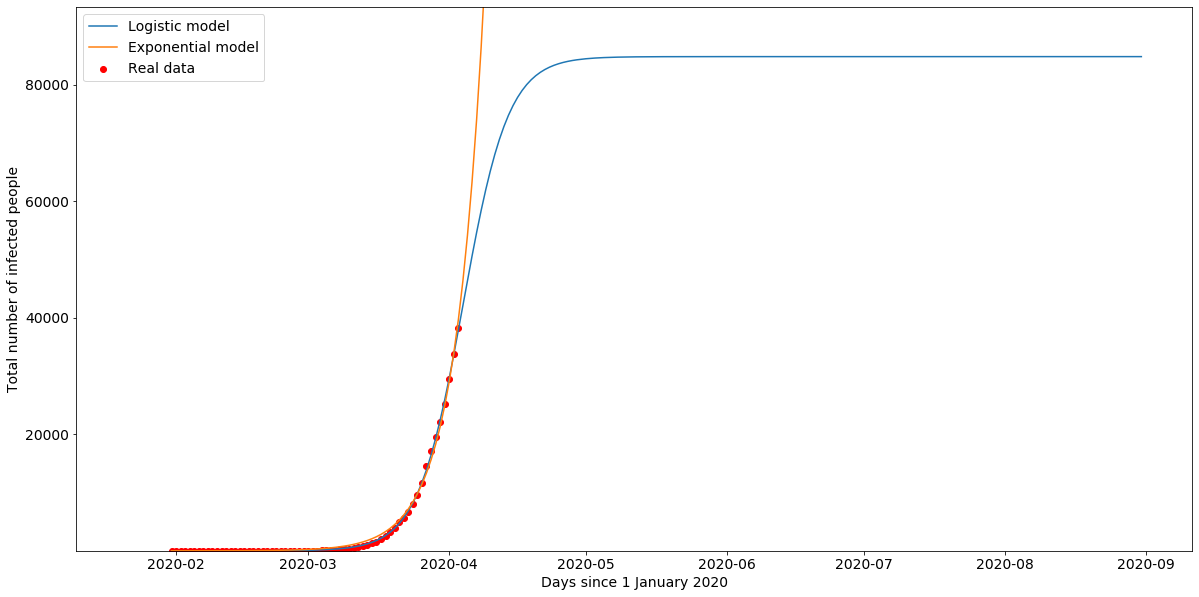

In [20]:
fig = plt.figure(figsize=(20,10))

pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(dates,y,label="Real data",color="red")
# Predicted logistic curve
plt.plot(date_list, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in range(0+min(x),len(date_list)+min(x))], label="Logistic model" )
# Predicted exponential curve
plt.plot(date_list, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in range(0+min(x),len(date_list)+min(x))], label="Exponential model" )
plt.legend()
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c*1.1))
plt.show()

In [21]:
lm_predicted = [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in range(0+min(x),len(date_list)+min(x))]

In [22]:
from datetime import date, datetime
today = date.today()
today_with_time = datetime(
    year=today.year, 
    month=today.month,
    day=today.day,
    hour=0,
    minute=0
)

In [23]:
try:
    location = date_list.index(today_with_time)
    print(today, " was found in the list.") 
except:
    print(today, " was not found in the list.") 

2020-04-03  was found in the list.


In [24]:
print(date_list[location+7])
print(lm_predicted[location+7])

total_cases_predicted_in_a_week = lm_predicted[location+7]
current_cases = lm_predicted[location]

growth_factor_in_a_week = total_cases_predicted_in_a_week / current_cases
print(growth_factor_in_a_week)

2020-04-10 00:00:00
65147.191856356556
1.720977147017929


# Read in the beds data: Using the beds data for England in Q1 2019 as a baseline (current Quarter in 2020) before the COVID-19 cases

In [25]:
### Using Q1 beds data from 2019 as a baseline
df_england_beds = pd.read_excel('https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/02/Beds-Timeseries-2010-11-onwards-Q3-2019-20-ADJ-for-missings-j8hyu.xls', header=13)
df_england_beds

Unnamed: 0                                               Year Period  \
0          NaN                                            2010/11     Q1   
1          NaN                                            2010/11     Q2   
2          NaN                                            2010/11     Q3   
3          NaN                                            2010/11     Q4   
4          NaN                                            2011/12     Q1   
5          NaN                                            2011/12     Q2   
6          NaN                                            2011/12     Q3   
7          NaN                                            2011/12     Q4   
8          NaN                                            2012/13     Q1   
9          NaN                                            2012/13     Q2   
10         NaN                                            2012/13     Q3   
11         NaN                                            2012/13     Q4   
12         NaN                                            2013/14     Q1   
13         NaN                                            2013/14     Q2   
14         NaN                                            2013/14     Q3   
15         NaN                                            2013/14     Q4   
16         NaN                                            2014/15     Q1   
17         NaN                                            2014/15     Q2   
18         NaN                                            2014/15     Q3   
19         NaN                                            2014/15     Q4   
20         NaN                                            2015/16     Q1   
21         NaN                                            2015/16     Q2   
22         NaN                                            2015/16     Q3   
23         NaN                                            2015/16     Q4   
24         NaN                                            2016/17     Q1   
25         NaN                                            2016/17     Q2   
26         NaN                                            2016/17     Q3   
27         NaN                                            2016/17     Q4   
28         NaN                                            2017/18     Q1   
29         NaN                                            2017/18     Q2   
30         NaN                                            2017/18     Q3   
31         NaN                                            2017/18     Q4   
32         NaN                                            2018/19     Q1   
33         NaN                                            2018/19     Q2   
34         NaN                                            2018/19     Q3   
35         NaN                                            2018/19     Q4   
36         NaN                                            2019/20     Q1   
37         NaN                                            2019/20     Q2   
38         NaN                                            2019/20     Q3   
39         NaN                                                NaN    NaN   
40         NaN  Notes: Figures highlighted in red include esti...    NaN   

   Org Name         Total   General & Acute  Learning Disabilities  \
0   England  144454.873626    110568.183516            2465.241758   
1   England  141477.344565    108348.798913            2237.293478   
2   England  141629.632609    108023.228261            2087.858696   
3   England  142319.227778    108889.851111            1973.755556   
4   England  137353.629670    104574.416484            1720.978022   
5   England  138524.575000    105544.977174            1784.130435   
6   England  137963.390217    105244.730435            1756.489130   
7   England  140454.207692    107448.674725            1937.153846   
8   England  137286.797802    104888.079121            1965.637363   
9   England  135559.169565    103729.958696            1743.423913   
10  England  136043.768587    103955.8586

In [26]:
df_england_beds.columns

Index(['Unnamed: 0', 'Year', 'Period', 'Org Name', 'Total ', 'General & Acute',
       'Learning Disabilities', 'Maternity', 'Mental Illness', 'Unnamed: 9',
       'Total .1', 'General & Acute.1', 'Learning Disabilities.1',
       'Maternity.1', 'Mental Illness.1', 'Unnamed: 15', 'Total .2',
       'General & Acute.2', 'Learning Disabilities.2', 'Maternity.2',
       'Mental Illness.2', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

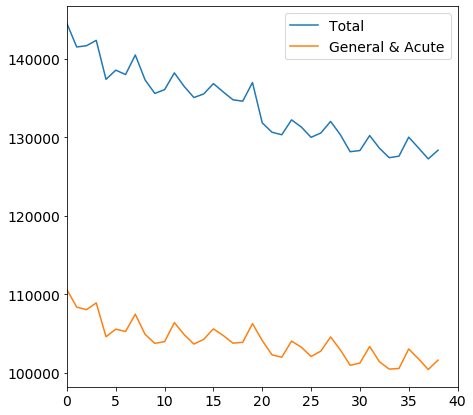

In [27]:
df_england_beds[['Year','Total ', 'General & Acute']].plot()

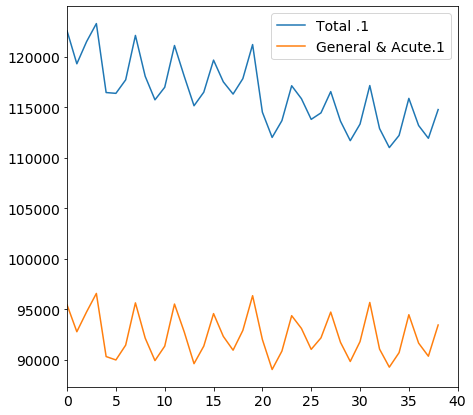

In [28]:
df_england_beds[['Year','Total .1', 'General & Acute.1']].plot()

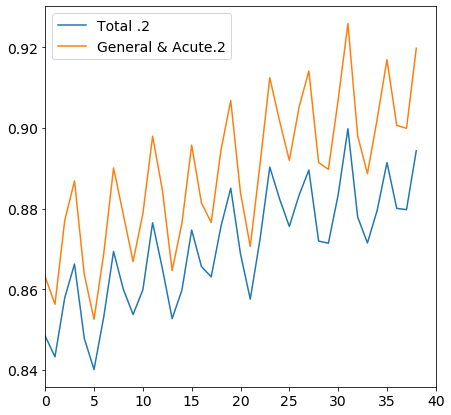

In [29]:
df_england_beds[['Year','Total .2', 'General & Acute.2']].plot()

# read in the free beds via hospital

In [30]:
df_england_beds_region = pd.read_excel("https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2019/11/Beds-Open-Overnight-Web_File-Final-Q1-201920.xlsx", header=14)
df_england_beds_region

Unnamed: 0     Year Period End Region Code Org Code  \
0           NaN  2019-20       June         NaN      NaN   
1           NaN      NaN        NaN         NaN      NaN   
2           NaN  2019-20       June         Y56      R1H   
3           NaN  2019-20       June         Y56      R1K   
4           NaN  2019-20       June         Y56      RAL   
5           NaN  2019-20       June         Y56      RAN   
6           NaN  2019-20       June         Y56      RAP   
7           NaN  2019-20       June         Y56      RAS   
8           NaN  2019-20       June         Y56      RAT   
9           NaN  2019-20       June         Y56      RAX   
10          NaN  2019-20       June         Y56      RF4   
11          NaN  2019-20       June         Y56      RJ1   
12          NaN  2019-20       June         Y56      RJ2   
13          NaN  2019-20       June         Y56      RJ6   
14          NaN  2019-20       June         Y56      RJ7   
15          NaN  2019-20       June         Y56      RJZ   
16          NaN  2019-20       June         Y56      RKE   
17          NaN  2019-20       June         Y56      RKL   
18          NaN  2019-20       June         Y56      RP4   
19          NaN  2019-20       June         Y56      RP6   
20          NaN  2019-20       June         Y56      RPG   
21          NaN  2019-20       June         Y56      RPY   
22          NaN  2019-20       June         Y56      RQM   
23          NaN  2019-20       June         Y56      RQX   
24          NaN  2019-20       June         Y56      RQY   
25          NaN  2019-20       June         Y56      RRP   
26          NaN  2019-20       June         Y56      RRV   
27          NaN  2019-20       June         Y56      RT3   
28          NaN  2019-20       June         Y56      RV3   
29          NaN  2019-20       June         Y56      RVR   
..          ...      ...        ...         ...      ...   
177         NaN  2019-20       June         Y63      RCB   
178         NaN  2019-20       June         Y63      RCD   
179         NaN  2019-20       June         Y63      RCF   
180         NaN  2019-20       June         Y63      RCU   
181         NaN  2019-20       June         Y63      RFF   
182         NaN  2019-20       June         Y63      RFR   
183         NaN  2019-20       June         Y63      RGD   
184         NaN  2019-20       June         Y63      RHQ   
185         NaN  2019-20       June         Y63      RJL   
186         NaN  2019-20       June         Y63      RNL   
187         NaN  2019-20       June         Y63      RNN   
188         NaN  2019-20       June         Y63      RP5   
189         NaN  2019-20       June         Y63      RR7   
190         NaN  2019-20       June         Y63      RR8   
191         NaN  2019-20       June         Y63      RTD   
192         NaN  2019-20       June         Y63      RTF   
193         NaN  2019-20       June         Y63      RTR   
194         NaN  2019-20       June         Y63      RV9   
195         NaN  2019-20       June         Y63      RVW   
196         NaN  2019-20       June         Y63      RWA   
197         NaN  2019-20       June         Y63      RWY   
198         NaN  2019-20       June         Y63      RX3   
199         NaN  2019-20       June         Y63      RX4   
200         NaN  2019-20       June         Y63      RXE   
201         NaN  2019-20       June         Y63      RXF   
202         NaN  2019-20       June         Y63      RXG   
203         NaN  2019-20       June         Y63      RXP   
204         NaN  2019-20       June         Y63      RY6   
205         NaN  2019-20       June         Y63      TAD   
206         NaN  2019-20       June         Y63      TAH   

                                              Org Name         Total   \
0                                              England  128620.549451   
1                                                  NaN            NaN   
2                               BARTS HEALTH NHS TRUST    1836.96

In [31]:
df_england_beds_region['Free General & Acute'] = df_england_beds_region['General & Acute'] - df_england_beds_region['General & Acute.1']

In [32]:
df_england_beds_region.index = df_england_beds_region['Org Name']

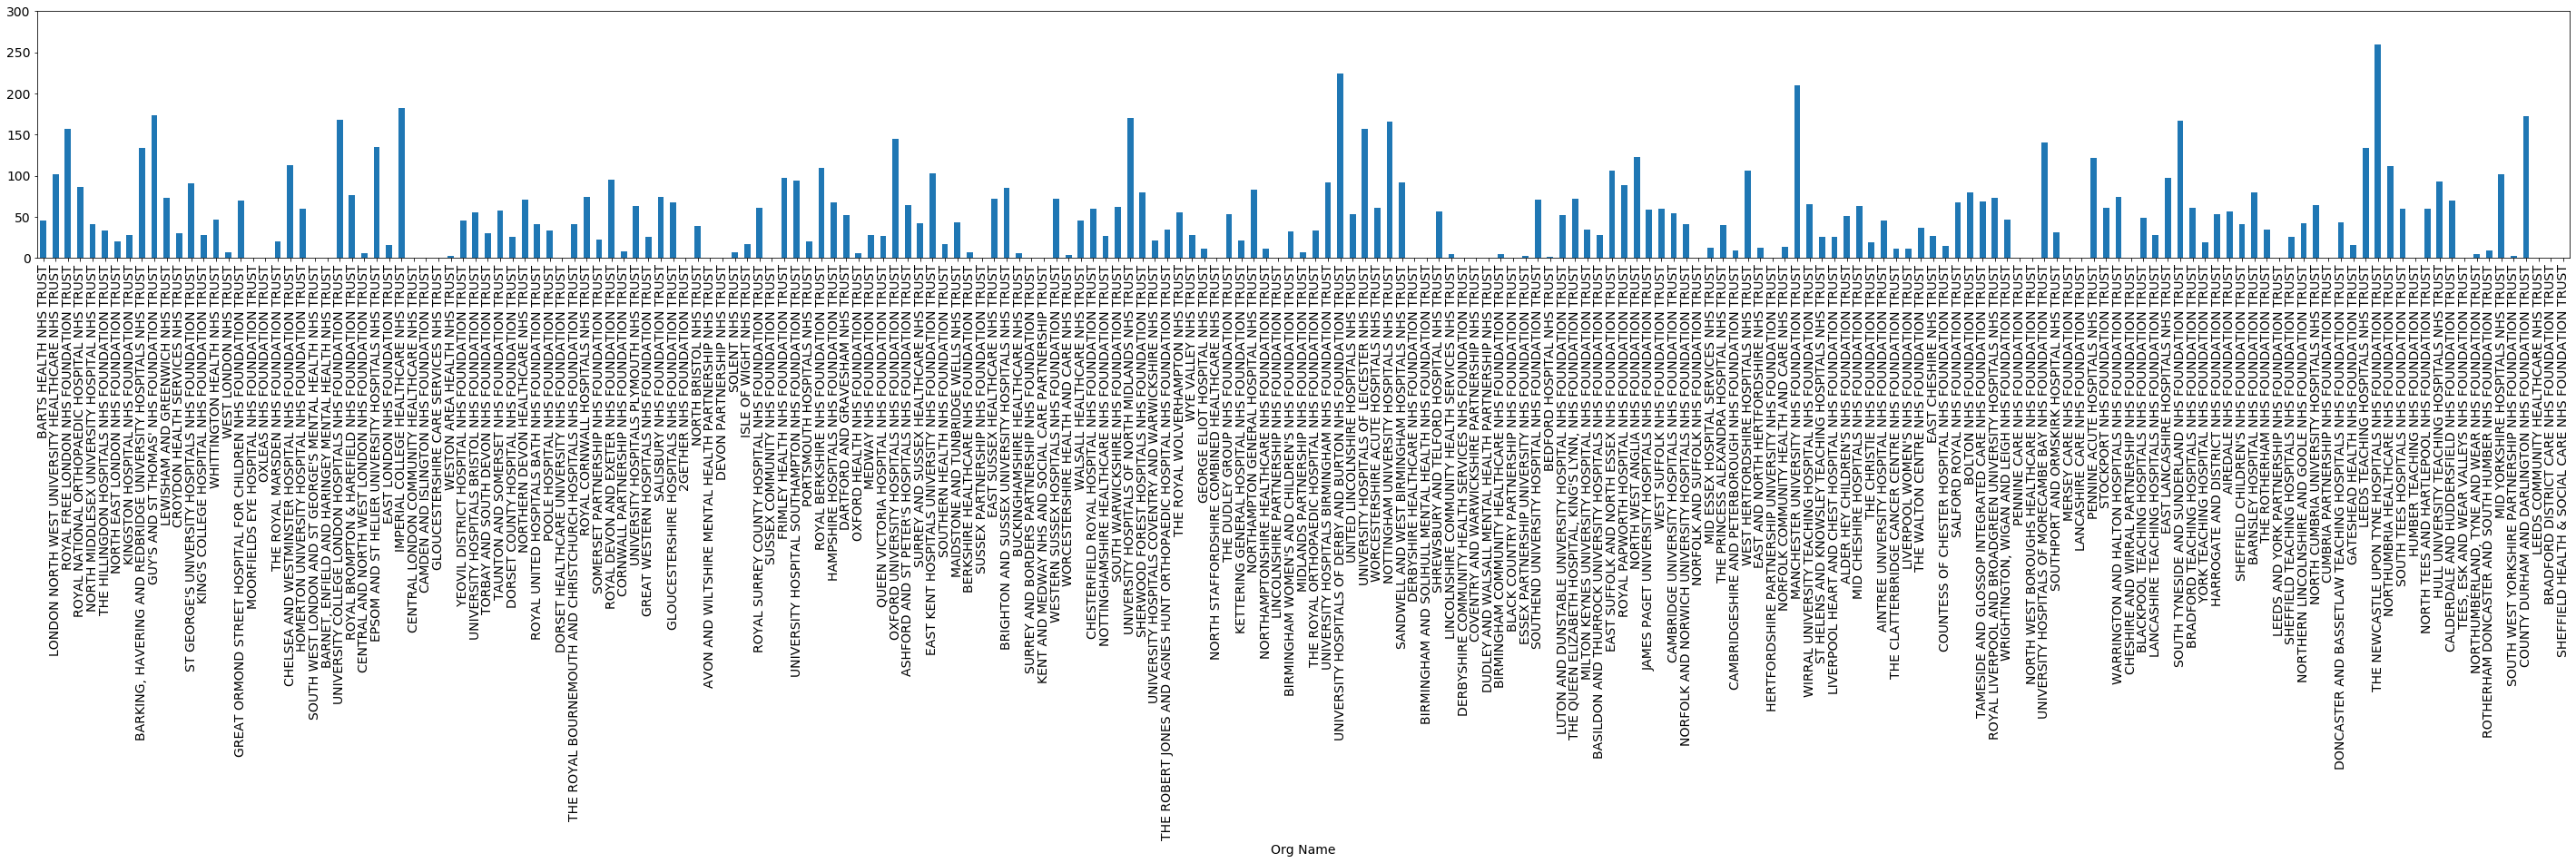

In [33]:
df_england_beds_region['Free General & Acute'][2:].plot(figsize=(50,5), kind='bar', ylim=(0,300))

# read in the latest UK COVID-19 data for England regions

In [34]:
# download UK regional cases
url = "https://www.arcgis.com/sharing/rest/content/items/b684319181f94875a6879bbc833ca3a6/data"
df_UK = pd.read_csv(url)
df_UK["lat"] = np.nan
df_UK["lon"] = np.nan
df_UK.head()

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

geolocator = Nominatim(user_agent="covid_shahinrostami.com")

In [35]:
for index, row in df_UK.iterrows():
    location = geolocator.geocode(f"{row.GSS_NM}, UK",timeout=100)

    df_UK.loc[index,'lat'] = location.latitude 
    df_UK.loc[index,'lon'] = location.longitude

print("Done!")

Done!


In [36]:
df_UK

GSS_CD                        GSS_NM  TotalCases        lat       lon
0    E06000001                    Hartlepool          23  54.685728 -1.209370
1    E06000002                 Middlesbrough          92  54.576042 -1.234405
2    E06000003          Redcar and Cleveland          64  54.567906 -1.005496
3    E06000004              Stockton-on-Tees          77  54.564094 -1.312916
4    E06000005                    Darlington          32  54.524208 -1.555581
5    E06000006                        Halton          51  53.353853 -2.742783
6    E06000007                    Warrington          82  53.401858 -2.568022
7    E06000008         Blackburn with Darwen          43  53.699177 -2.470900
8    E06000009                     Blackpool          41  53.824548 -3.037320
9    E06000010   Kingston upon Hull, City of          21  53.743572 -0.339476
10   E06000011      East Riding of Yorkshire          72  53.873597 -0.534779
11   E06000012       North East Lincolnshire          29  53.536803 -0.093681
12   E06000013            North Lincolnshire          29  53.589744 -0.602323
13   E06000014                          York          57  53.959055 -1.081536
14   E06000015                         Derby         187  52.921262 -1.476149
15   E06000016                     Leicester         149  52.636140 -1.133079
16   E06000017                       Rutland           6  52.642304 -0.663264
17   E06000018                    Nottingham         161  52.953419 -1.149646
18   E06000019      Herefordshire, County of          51  52.083333 -2.750000
19   E06000020            Telford and Wrekin          62  52.721445 -2.500862
20   E06000021                Stoke-on-Trent          76  53.016201 -2.181261
21   E06000022  Bath and North East Somerset          52  51.356324 -2.486661
22   E06000023              Bristol, City of         156  51.453802 -2.597298
23   E06000024                North Somerset          58  51.396630 -2.769129
24   E06000025         South Gloucestershire         104  51.549192 -2.480953
25   E06000026                      Plymouth          71  50.371266 -4.142566
26   E06000027                        Torbay          51  50.446247 -3.539500
27   E06000030                       Swindon          44  51.561368 -1.785685
28   E06000031                  Peterborough          48  52.572577 -0.242734
29   E06000032                         Luton         116  51.891073 -0.423030
..         ...                           ...         ...        ...       ...
119  E09000030                 Tower Hamlets         287  51.128863  1.298669
120  E09000031                Waltham Forest         309  51.198159  1.016517
121  E09000032                    Wandsworth         434  51.457027 -0.193261
122  E09000033                   Westminster         322  51.501356 -0.124930
123  E10000002               Buckinghamshire         222  51.783499 -0.894644
124  E10000003                Cambridgeshire         172  52.333333  0.083333
125  E10000006                       Cumbria         564  54.614314 -2.942098
126  E10000007                    Derbyshire         383  53.118503 -1.556618
127  E10000008                         Devon         163  50.724165 -3.660796
128  E10000011                   East Sussex         129  50.940453  0.369990
129  E10000012                         Essex         547  51.770468  0.464670
130  E10000013               Gloucestershire         224  51.833331 -2.166667
131  E10000014                     Hampshire         749  51.044835 -1.243409
132  E10000015                 Hertfordshire         637  51.840052 -0.097855
133  E10000016                          Kent         621  51.224464  0.733421
134  E10000017                    Lancashire         536  53.861170 -2.565089
135  E10000018                Leicestershire         267  52.666667 -1.000000
136  E10000019                  Lincolnshire         182  53.182303 -0.203121
137  E10000020                       Norfolk         225  52.666667  1.000000
138  E10000021              No

# match the local data to the beds regions

In [37]:
df_nhs_trusts = pd.read_csv('https://nhsenglandfilestore.s3.amazonaws.com/ods/etr.csv', header=None)

In [38]:
df_nhs_trusts

0                                                  1    2    3   \
0    R1A           WORCESTERSHIRE HEALTH AND CARE NHS TRUST  Y55  Q77   
1    R1C                                   SOLENT NHS TRUST  Y57  Q70   
2    R1D              SHROPSHIRE COMMUNITY HEALTH NHS TRUST  Y55  Q76   
3    R1E  STAFFORDSHIRE AND STOKE ON TRENT PARTNERSHIP N...  Y55  Q76   
4    R1F                            ISLE OF WIGHT NHS TRUST  Y57  Q70   
5    R1G  TORBAY AND SOUTHERN DEVON HEALTH AND CARE NHS ...  Y57  Q80   
6    R1H                             BARTS HEALTH NHS TRUST  Y56  Q71   
7    R1J            GLOUCESTERSHIRE CARE SERVICES NHS TRUST  Y57  Q82   
8    R1K             LONDON NORTH WEST HEALTHCARE NHS TRUST  Y56  Q71   
9    RA2  ROYAL SURREY COUNTY HOSPITAL NHS FOUNDATION TRUST  Y57  Q81   
10   RA3                       WESTON AREA HEALTH NHS TRUST  Y57  Q80   
11   RA4      YEOVIL DISTRICT HOSPITAL NHS FOUNDATION TRUST  Y57  Q80   
12   RA7  UNIVERSITY HOSPITALS BRISTOL NHS FOUNDATION TRUST  Y57  Q80   
13   RA9        TORBAY AND SOUTH DEVON NHS FOUNDATION TRUST  Y57  Q80   
14   RAE   BRADFORD TEACHING HOSPITALS NHS FOUNDATION TRUST  Y54  Q72   
15   RAJ  SOUTHEND UNIVERSITY HOSPITAL NHS FOUNDATION TRUST  Y55  Q79   
16   RAL             ROYAL FREE LONDON NHS FOUNDATION TRUST  Y56  Q71   
17   RAN      ROYAL NATIONAL ORTHOPAEDIC HOSPITAL NHS TRUST  Y56  Q71   
18   RAP      NORTH MIDDLESEX UNIVERSITY HOSPITAL NHS TRUST  Y56  Q71   
19   RAS      THE HILLINGDON HOSPITALS NHS FOUNDATION TRUST  Y56  Q71   
20   RAT             NORTH EAST LONDON NHS FOUNDATION TRUST  Y56  Q71   
21   RAX             KINGSTON HOSPITAL NHS FOUNDATION TRUST  Y56  Q71   
22   RBA          TAUNTON AND SOMERSET NHS FOUNDATION TRUST  Y57  Q80   
23   RBD        DORSET COUNTY HOSPITAL NHS FOUNDATION TRUST  Y57  Q70   
24   RBK                       WALSALL HEALTHCARE NHS TRUST  Y55  Q77   
25   RBL  WIRRAL UNIVERSITY TEACHING HOSPITAL NHS FOUNDA...  Y54  Q75   
26   RBN  ST HELENS AND KNOWSLEY HOSPITAL SERVICES NHS T...  Y54  Q75   
27   RBQ  LIVERPOOL HEART AND CHEST HOSPITAL NHS FOUNDAT...  Y54  Q75   
28   RBS          ALDER HEY CHILDREN'S NHS FOUNDATION TRUST  Y54  Q75   
29   RBT        MID CHESHIRE HOSPITALS NHS FOUNDATION TRUST  Y54  Q75   
..   ...                                                ...  ...  ...   
209  RXQ               BUCKINGHAMSHIRE HEALTHCARE NHS TRUST  Y57  Q82   
210  RXR                EAST LANCASHIRE HOSPITALS NHS TRUST  Y54  Q84   
211  RXT  BIRMINGHAM AND SOLIHULL MENTAL HEALTH NHS FOUN...  Y55  Q77   
212  RXV  GREATER MANCHESTER WEST MENTAL HEALTH NHS FOUN...  Y54  Q83   
213  RXW          SHREWSBURY AND TELFORD HOSPITAL NHS TRUST  Y55  Q76   
214  RXX  SURREY AND BORDERS PARTNERSHIP NHS FOUNDATION ...  Y57  Q81   
215  RXY  KENT AND MEDWAY NHS AND SOCIAL CARE PARTNERSHI...  Y57  Q81   
216  RY1               LIVERPOOL COMMUNITY HEALTH NHS TRUST  Y54  Q75   
217  RY2  BRIDGEWATER COMMUNITY HEALTHCARE NHS FOUNDATIO...  Y54  Q83   
218  RY3        NORFOLK COMMUNITY HEALTH AND CARE NHS TRUST  Y55  Q79   
219  RY4                  HERTFORDSHIRE COMMUNITY NHS TRUST  Y55  Q78   
220  RY5   LINCOLNSHIRE COMMUNITY HEALTH SERVICES NHS TRUST  Y55  Q78   
221  RY6               LEEDS COMMUNITY HEALTHCARE NHS TRUST  Y54  Q72   
222  RY7              WIRRAL COMMUNITY NHS FOUNDATION TRUST  Y54  Q75   
223  RY8  DERBYSHIRE COMMUNITY HEALTH SERVICES NHS FOUND...  Y55  Q76   
224  RY9  HOUNSLOW AND RICHMOND COMMUNITY HEALTHCARE NHS...  Y56  Q71   
225  RYA  WEST MIDLANDS AMBULANCE SERVICE NHS FOUNDATION...  Y55  Q77   
226  RYC        EAST OF ENGLAND AMBULANCE SERVICE NHS TRUST  Y55  Q79   
227  RYD  SOUTH EAST COAST AMBULANCE SERVICE NHS FOUNDAT...  Y57  Q81   
228  RYE  SOUTH CENTRAL AMBULANCE SERVICE NHS FOUNDATION...  Y57  Q82   
229  RYF  SOUTH WESTERN AMBULANCE SERVICE NHS FOUNDATION...  Y57  Q80   
230  RYG    COVENTRY AND WARWICKSHIRE PARTNERSHIP NHS TRUST  Y55  Q77   
231  RYJ              IMPERIAL COLLEGE HEALTHCARE NHS TRUST  Y56

In [39]:
matches = []
for org_name in df_england_beds_region['Org Name']: 
    for trust in df_nhs_trusts[1]:
        if trust == org_name:
            print(trust, ' matches ', org_name)
            matches.append(trust + ' matches ' + org_name)

BARTS HEALTH NHS TRUST  matches  BARTS HEALTH NHS TRUST
ROYAL FREE LONDON NHS FOUNDATION TRUST  matches  ROYAL FREE LONDON NHS FOUNDATION TRUST
ROYAL NATIONAL ORTHOPAEDIC HOSPITAL NHS TRUST  matches  ROYAL NATIONAL ORTHOPAEDIC HOSPITAL NHS TRUST
NORTH MIDDLESEX UNIVERSITY HOSPITAL NHS TRUST  matches  NORTH MIDDLESEX UNIVERSITY HOSPITAL NHS TRUST
THE HILLINGDON HOSPITALS NHS FOUNDATION TRUST  matches  THE HILLINGDON HOSPITALS NHS FOUNDATION TRUST
NORTH EAST LONDON NHS FOUNDATION TRUST  matches  NORTH EAST LONDON NHS FOUNDATION TRUST
KINGSTON HOSPITAL NHS FOUNDATION TRUST  matches  KINGSTON HOSPITAL NHS FOUNDATION TRUST
BARKING, HAVERING AND REDBRIDGE UNIVERSITY HOSPITALS NHS TRUST  matches  BARKING, HAVERING AND REDBRIDGE UNIVERSITY HOSPITALS NHS TRUST
GUY'S AND ST THOMAS' NHS FOUNDATION TRUST  matches  GUY'S AND ST THOMAS' NHS FOUNDATION TRUST
LEWISHAM AND GREENWICH NHS TRUST  matches  LEWISHAM AND GREENWICH NHS TRUST
CROYDON HEALTH SERVICES NHS TRUST  matches  CROYDON HEALTH SERVICES 

In [40]:
df_england_beds_region.reset_index(drop=True)

Unnamed: 0     Year Period End Region Code Org Code  \
0           NaN  2019-20       June         NaN      NaN   
1           NaN      NaN        NaN         NaN      NaN   
2           NaN  2019-20       June         Y56      R1H   
3           NaN  2019-20       June         Y56      R1K   
4           NaN  2019-20       June         Y56      RAL   
5           NaN  2019-20       June         Y56      RAN   
6           NaN  2019-20       June         Y56      RAP   
7           NaN  2019-20       June         Y56      RAS   
8           NaN  2019-20       June         Y56      RAT   
9           NaN  2019-20       June         Y56      RAX   
10          NaN  2019-20       June         Y56      RF4   
11          NaN  2019-20       June         Y56      RJ1   
12          NaN  2019-20       June         Y56      RJ2   
13          NaN  2019-20       June         Y56      RJ6   
14          NaN  2019-20       June         Y56      RJ7   
15          NaN  2019-20       June         Y56      RJZ   
16          NaN  2019-20       June         Y56      RKE   
17          NaN  2019-20       June         Y56      RKL   
18          NaN  2019-20       June         Y56      RP4   
19          NaN  2019-20       June         Y56      RP6   
20          NaN  2019-20       June         Y56      RPG   
21          NaN  2019-20       June         Y56      RPY   
22          NaN  2019-20       June         Y56      RQM   
23          NaN  2019-20       June         Y56      RQX   
24          NaN  2019-20       June         Y56      RQY   
25          NaN  2019-20       June         Y56      RRP   
26          NaN  2019-20       June         Y56      RRV   
27          NaN  2019-20       June         Y56      RT3   
28          NaN  2019-20       June         Y56      RV3   
29          NaN  2019-20       June         Y56      RVR   
..          ...      ...        ...         ...      ...   
177         NaN  2019-20       June         Y63      RCB   
178         NaN  2019-20       June         Y63      RCD   
179         NaN  2019-20       June         Y63      RCF   
180         NaN  2019-20       June         Y63      RCU   
181         NaN  2019-20       June         Y63      RFF   
182         NaN  2019-20       June         Y63      RFR   
183         NaN  2019-20       June         Y63      RGD   
184         NaN  2019-20       June         Y63      RHQ   
185         NaN  2019-20       June         Y63      RJL   
186         NaN  2019-20       June         Y63      RNL   
187         NaN  2019-20       June         Y63      RNN   
188         NaN  2019-20       June         Y63      RP5   
189         NaN  2019-20       June         Y63      RR7   
190         NaN  2019-20       June         Y63      RR8   
191         NaN  2019-20       June         Y63      RTD   
192         NaN  2019-20       June         Y63      RTF   
193         NaN  2019-20       June         Y63      RTR   
194         NaN  2019-20       June         Y63      RV9   
195         NaN  2019-20       June         Y63      RVW   
196         NaN  2019-20       June         Y63      RWA   
197         NaN  2019-20       June         Y63      RWY   
198         NaN  2019-20       June         Y63      RX3   
199         NaN  2019-20       June         Y63      RX4   
200         NaN  2019-20       June         Y63      RXE   
201         NaN  2019-20       June         Y63      RXF   
202         NaN  2019-20       June         Y63      RXG   
203         NaN  2019-20       June         Y63      RXP   
204         NaN  2019-20       June         Y63      RY6   
205         NaN  2019-20       June         Y63      TAD   
206         NaN  2019-20       June         Y63      TAH   

                                              Org Name         Total   \
0                                              England  128620.549451   
1                                                  NaN            NaN   
2                               BARTS HEALTH NHS TRUST    1836.96

In [41]:
merged_df = df_england_beds_region.reset_index(drop=True).merge(df_nhs_trusts[[1,9]], how='outer', left_on=["Org Name"], right_on=[1])

In [42]:
merged_df

Unnamed: 0     Year Period End Region Code Org Code  \
0           NaN  2019-20       June         NaN      NaN   
1           NaN      NaN        NaN         NaN      NaN   
2           NaN  2019-20       June         Y56      R1H   
3           NaN  2019-20       June         Y56      R1K   
4           NaN  2019-20       June         Y56      RAL   
5           NaN  2019-20       June         Y56      RAN   
6           NaN  2019-20       June         Y56      RAP   
7           NaN  2019-20       June         Y56      RAS   
8           NaN  2019-20       June         Y56      RAT   
9           NaN  2019-20       June         Y56      RAX   
10          NaN  2019-20       June         Y56      RF4   
11          NaN  2019-20       June         Y56      RJ1   
12          NaN  2019-20       June         Y56      RJ2   
13          NaN  2019-20       June         Y56      RJ6   
14          NaN  2019-20       June         Y56      RJ7   
15          NaN  2019-20       June         Y56      RJZ   
16          NaN  2019-20       June         Y56      RKE   
17          NaN  2019-20       June         Y56      RKL   
18          NaN  2019-20       June         Y56      RP4   
19          NaN  2019-20       June         Y56      RP6   
20          NaN  2019-20       June         Y56      RPG   
21          NaN  2019-20       June         Y56      RPY   
22          NaN  2019-20       June         Y56      RQM   
23          NaN  2019-20       June         Y56      RQX   
24          NaN  2019-20       June         Y56      RQY   
25          NaN  2019-20       June         Y56      RRP   
26          NaN  2019-20       June         Y56      RRV   
27          NaN  2019-20       June         Y56      RT3   
28          NaN  2019-20       June         Y56      RV3   
29          NaN  2019-20       June         Y56      RVR   
..          ...      ...        ...         ...      ...   
234         NaN      NaN        NaN         NaN      NaN   
235         NaN      NaN        NaN         NaN      NaN   
236         NaN      NaN        NaN         NaN      NaN   
237         NaN      NaN        NaN         NaN      NaN   
238         NaN      NaN        NaN         NaN      NaN   
239         NaN      NaN        NaN         NaN      NaN   
240         NaN      NaN        NaN         NaN      NaN   
241         NaN      NaN        NaN         NaN      NaN   
242         NaN      NaN        NaN         NaN      NaN   
243         NaN      NaN        NaN         NaN      NaN   
244         NaN      NaN        NaN         NaN      NaN   
245         NaN      NaN        NaN         NaN      NaN   
246         NaN      NaN        NaN         NaN      NaN   
247         NaN      NaN        NaN         NaN      NaN   
248         NaN      NaN        NaN         NaN      NaN   
249         NaN      NaN        NaN         NaN      NaN   
250         NaN      NaN        NaN         NaN      NaN   
251         NaN      NaN        NaN         NaN      NaN   
252         NaN      NaN        NaN         NaN      NaN   
253         NaN      NaN        NaN         NaN      NaN   
254         NaN      NaN        NaN         NaN      NaN   
255         NaN      NaN        NaN         NaN      NaN   
256         NaN      NaN        NaN         NaN      NaN   
257         NaN      NaN        NaN         NaN      NaN   
258         NaN      NaN        NaN         NaN      NaN   
259         NaN      NaN        NaN         NaN      NaN   
260         NaN      NaN        NaN         NaN      NaN   
261         NaN      NaN        NaN         NaN      NaN   
262         NaN      NaN        NaN         NaN      NaN   
263         NaN      NaN        NaN         NaN      NaN   

                                              Org Name         Total   \
0                                              England  128620.549451   
1                                                  NaN            NaN   
2                               BARTS HEALTH NHS TRUST    1836.96

In [43]:
nomi = pgeocode.Nominatim('gb')

In [44]:
lat_list = []
lon_list = []
for item in merged_df[9]:
    item = str(item)
    if item == "NaN" or item == "nan":
        lat_list.append(0)
        lon_list.append(0)
    else:
        lat = nomi.query_postal_code(item).latitude
        lon = nomi.query_postal_code(item).longitude
        lat_list.append(float(lat.item()))
        lon_list.append(float(lon.item()))

        
merged_df['lat'] = lat_list
merged_df['lon'] = lon_list

In [45]:
merged_df

Unnamed: 0     Year Period End Region Code Org Code  \
0           NaN  2019-20       June         NaN      NaN   
1           NaN      NaN        NaN         NaN      NaN   
2           NaN  2019-20       June         Y56      R1H   
3           NaN  2019-20       June         Y56      R1K   
4           NaN  2019-20       June         Y56      RAL   
5           NaN  2019-20       June         Y56      RAN   
6           NaN  2019-20       June         Y56      RAP   
7           NaN  2019-20       June         Y56      RAS   
8           NaN  2019-20       June         Y56      RAT   
9           NaN  2019-20       June         Y56      RAX   
10          NaN  2019-20       June         Y56      RF4   
11          NaN  2019-20       June         Y56      RJ1   
12          NaN  2019-20       June         Y56      RJ2   
13          NaN  2019-20       June         Y56      RJ6   
14          NaN  2019-20       June         Y56      RJ7   
15          NaN  2019-20       June         Y56      RJZ   
16          NaN  2019-20       June         Y56      RKE   
17          NaN  2019-20       June         Y56      RKL   
18          NaN  2019-20       June         Y56      RP4   
19          NaN  2019-20       June         Y56      RP6   
20          NaN  2019-20       June         Y56      RPG   
21          NaN  2019-20       June         Y56      RPY   
22          NaN  2019-20       June         Y56      RQM   
23          NaN  2019-20       June         Y56      RQX   
24          NaN  2019-20       June         Y56      RQY   
25          NaN  2019-20       June         Y56      RRP   
26          NaN  2019-20       June         Y56      RRV   
27          NaN  2019-20       June         Y56      RT3   
28          NaN  2019-20       June         Y56      RV3   
29          NaN  2019-20       June         Y56      RVR   
..          ...      ...        ...         ...      ...   
234         NaN      NaN        NaN         NaN      NaN   
235         NaN      NaN        NaN         NaN      NaN   
236         NaN      NaN        NaN         NaN      NaN   
237         NaN      NaN        NaN         NaN      NaN   
238         NaN      NaN        NaN         NaN      NaN   
239         NaN      NaN        NaN         NaN      NaN   
240         NaN      NaN        NaN         NaN      NaN   
241         NaN      NaN        NaN         NaN      NaN   
242         NaN      NaN        NaN         NaN      NaN   
243         NaN      NaN        NaN         NaN      NaN   
244         NaN      NaN        NaN         NaN      NaN   
245         NaN      NaN        NaN         NaN      NaN   
246         NaN      NaN        NaN         NaN      NaN   
247         NaN      NaN        NaN         NaN      NaN   
248         NaN      NaN        NaN         NaN      NaN   
249         NaN      NaN        NaN         NaN      NaN   
250         NaN      NaN        NaN         NaN      NaN   
251         NaN      NaN        NaN         NaN      NaN   
252         NaN      NaN        NaN         NaN      NaN   
253         NaN      NaN        NaN         NaN      NaN   
254         NaN      NaN        NaN         NaN      NaN   
255         NaN      NaN        NaN         NaN      NaN   
256         NaN      NaN        NaN         NaN      NaN   
257         NaN      NaN        NaN         NaN      NaN   
258         NaN      NaN        NaN         NaN      NaN   
259         NaN      NaN        NaN         NaN      NaN   
260         NaN      NaN        NaN         NaN      NaN   
261         NaN      NaN        NaN         NaN      NaN   
262         NaN      NaN        NaN         NaN      NaN   
263         NaN      NaN        NaN         NaN      NaN   

                                              Org Name         Total   \
0                                              England  128620.549451   
1                                                  NaN            NaN   
2                               BARTS HEALTH NHS TRUST    1836.96

# find the closest lat and lon to that trust from the geospatial data and join the datasets to the beds dataset

In [46]:
from math import cos, asin, sqrt

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest(data, v):
    return min(data, key=lambda p: distance(v['lat'],v['lon'],p['lat'],p['lon']))

In [47]:
tempDataList = [{'lat': 39.7612992, 'lon': -86.1519681}, 
                {'lat': 39.762241,  'lon': -86.158436 }, 
                {'lat': 39.7622292, 'lon': -86.1578917}]

v = {'lat': 39.7622290, 'lon': -86.1519750}
print(closest(tempDataList, v))

{'lat': 39.7612992, 'lon': -86.1519681}


In [48]:
df_UK

GSS_CD                        GSS_NM  TotalCases        lat       lon
0    E06000001                    Hartlepool          23  54.685728 -1.209370
1    E06000002                 Middlesbrough          92  54.576042 -1.234405
2    E06000003          Redcar and Cleveland          64  54.567906 -1.005496
3    E06000004              Stockton-on-Tees          77  54.564094 -1.312916
4    E06000005                    Darlington          32  54.524208 -1.555581
5    E06000006                        Halton          51  53.353853 -2.742783
6    E06000007                    Warrington          82  53.401858 -2.568022
7    E06000008         Blackburn with Darwen          43  53.699177 -2.470900
8    E06000009                     Blackpool          41  53.824548 -3.037320
9    E06000010   Kingston upon Hull, City of          21  53.743572 -0.339476
10   E06000011      East Riding of Yorkshire          72  53.873597 -0.534779
11   E06000012       North East Lincolnshire          29  53.536803 -0.093681
12   E06000013            North Lincolnshire          29  53.589744 -0.602323
13   E06000014                          York          57  53.959055 -1.081536
14   E06000015                         Derby         187  52.921262 -1.476149
15   E06000016                     Leicester         149  52.636140 -1.133079
16   E06000017                       Rutland           6  52.642304 -0.663264
17   E06000018                    Nottingham         161  52.953419 -1.149646
18   E06000019      Herefordshire, County of          51  52.083333 -2.750000
19   E06000020            Telford and Wrekin          62  52.721445 -2.500862
20   E06000021                Stoke-on-Trent          76  53.016201 -2.181261
21   E06000022  Bath and North East Somerset          52  51.356324 -2.486661
22   E06000023              Bristol, City of         156  51.453802 -2.597298
23   E06000024                North Somerset          58  51.396630 -2.769129
24   E06000025         South Gloucestershire         104  51.549192 -2.480953
25   E06000026                      Plymouth          71  50.371266 -4.142566
26   E06000027                        Torbay          51  50.446247 -3.539500
27   E06000030                       Swindon          44  51.561368 -1.785685
28   E06000031                  Peterborough          48  52.572577 -0.242734
29   E06000032                         Luton         116  51.891073 -0.423030
..         ...                           ...         ...        ...       ...
119  E09000030                 Tower Hamlets         287  51.128863  1.298669
120  E09000031                Waltham Forest         309  51.198159  1.016517
121  E09000032                    Wandsworth         434  51.457027 -0.193261
122  E09000033                   Westminster         322  51.501356 -0.124930
123  E10000002               Buckinghamshire         222  51.783499 -0.894644
124  E10000003                Cambridgeshire         172  52.333333  0.083333
125  E10000006                       Cumbria         564  54.614314 -2.942098
126  E10000007                    Derbyshire         383  53.118503 -1.556618
127  E10000008                         Devon         163  50.724165 -3.660796
128  E10000011                   East Sussex         129  50.940453  0.369990
129  E10000012                         Essex         547  51.770468  0.464670
130  E10000013               Gloucestershire         224  51.833331 -2.166667
131  E10000014                     Hampshire         749  51.044835 -1.243409
132  E10000015                 Hertfordshire         637  51.840052 -0.097855
133  E10000016                          Kent         621  51.224464  0.733421
134  E10000017                    Lancashire         536  53.861170 -2.565089
135  E10000018                Leicestershire         267  52.666667 -1.000000
136  E10000019                  Lincolnshire         182  53.182303 -0.203121
137  E10000020                       Norfolk         225  52.666667  1.000000
138  E10000021              No

In [49]:
hospital_lat = []
hospital_lon = []
for index, row in df_UK.iterrows():
    v = {'lat': row['lat'], 'lon': row['lon']}
    match = closest(list(merged_df[['lat','lon']].T.to_dict().values()),v)
    hospital_lat.append(match['lat'])
    hospital_lon.append(match['lon'])

In [50]:
df_UK['hospital_lat'] = hospital_lat
df_UK['hospital_lon'] = hospital_lon

In [51]:
df_UK

GSS_CD                        GSS_NM  TotalCases        lat       lon  \
0    E06000001                    Hartlepool          23  54.685728 -1.209370   
1    E06000002                 Middlesbrough          92  54.576042 -1.234405   
2    E06000003          Redcar and Cleveland          64  54.567906 -1.005496   
3    E06000004              Stockton-on-Tees          77  54.564094 -1.312916   
4    E06000005                    Darlington          32  54.524208 -1.555581   
5    E06000006                        Halton          51  53.353853 -2.742783   
6    E06000007                    Warrington          82  53.401858 -2.568022   
7    E06000008         Blackburn with Darwen          43  53.699177 -2.470900   
8    E06000009                     Blackpool          41  53.824548 -3.037320   
9    E06000010   Kingston upon Hull, City of          21  53.743572 -0.339476   
10   E06000011      East Riding of Yorkshire          72  53.873597 -0.534779   
11   E06000012       North East Lincolnshire          29  53.536803 -0.093681   
12   E06000013            North Lincolnshire          29  53.589744 -0.602323   
13   E06000014                          York          57  53.959055 -1.081536   
14   E06000015                         Derby         187  52.921262 -1.476149   
15   E06000016                     Leicester         149  52.636140 -1.133079   
16   E06000017                       Rutland           6  52.642304 -0.663264   
17   E06000018                    Nottingham         161  52.953419 -1.149646   
18   E06000019      Herefordshire, County of          51  52.083333 -2.750000   
19   E06000020            Telford and Wrekin          62  52.721445 -2.500862   
20   E06000021                Stoke-on-Trent          76  53.016201 -2.181261   
21   E06000022  Bath and North East Somerset          52  51.356324 -2.486661   
22   E06000023              Bristol, City of         156  51.453802 -2.597298   
23   E06000024                North Somerset          58  51.396630 -2.769129   
24   E06000025         South Gloucestershire         104  51.549192 -2.480953   
25   E06000026                      Plymouth          71  50.371266 -4.142566   
26   E06000027                        Torbay          51  50.446247 -3.539500   
27   E06000030                       Swindon          44  51.561368 -1.785685   
28   E06000031                  Peterborough          48  52.572577 -0.242734   
29   E06000032                         Luton         116  51.891073 -0.423030   
..         ...                           ...         ...        ...       ...   
119  E09000030                 Tower Hamlets         287  51.128863  1.298669   
120  E09000031                Waltham Forest         309  51.198159  1.016517   
121  E09000032                    Wandsworth         434  51.457027 -0.193261   
122  E09000033                   Westminster         322  51.501356 -0.124930   
123  E10000002               Buckinghamshire         222  51.783499 -0.894644   
124  E10000003                Cambridgeshire         172  52.333333  0.083333   
125  E10000006                       Cumbria         564  54.614314 -2.942098   
126  E10000007                    Derbyshire         383  53.118503 -1.556618   
127  E10000008                         Devon         163  50.724165 -3.660796   
128  E10000011                   East Sussex         129  50.940453  0.369990   
129  E10000012                         Essex         547  51.770468  0.464670   
130  E10000013               Gloucestershire         224  51.833331 -2.166667   
131  E10000014                     Hampshire         749  51.044835 -1.243409   
132  E10000015                 Hertfordshire         637  51.840052 -0.097855   
133  E10000016                          Kent         621  51.224464  0.733421   
134  E10000017                    Lancashire         536  53.861170 -2.565089   
135  E10000018                Leicestershire         267  52.666667 -1.000000   
136  E10000019                  Lincoln

In [52]:
merged_df['Total ']

0      128620.549451
1                NaN
2        1836.967033
3        1245.714286
4        1084.670330
5         191.714286
6         508.890110
7         487.439560
8         355.450549
9         424.967033
10        974.000000
11       1138.000000
12        997.186813
13        535.934066
14        938.000000
15       1438.263736
16        351.681319
17        767.043956
18        281.417582
19          6.703297
20        396.395604
21        185.615385
22        878.131868
23        307.153846
24        380.527473
25        490.989011
26        903.549451
27        392.637363
28        841.560440
29        867.285714
           ...      
234              NaN
235              NaN
236              NaN
237              NaN
238              NaN
239              NaN
240              NaN
241              NaN
242              NaN
243              NaN
244              NaN
245              NaN
246              NaN
247              NaN
248              NaN
249              NaN
250          

In [53]:
df_UK_merged = df_UK.merge(merged_df[["Org Name", "Total ", "General & Acute",  "Total .1", "General & Acute.1","lat","lon"]], how='inner', left_on=["hospital_lon", "hospital_lat"], right_on=["lon","lat"])

In [54]:
df_UK_merged['Free Beds Without COVID-19'] = df_UK_merged['General & Acute'] - df_UK_merged['General & Acute.1']

In [55]:
Free_Beds_INCLUDING_COVID = []
counts_list = df_UK_merged.groupby(by=['GSS_NM'])['GSS_NM'].count()
for item in df_UK_merged['GSS_NM']:
    print(item)
    Free_Beds_INCLUDING_COVID.append(counts_list[item])

Hartlepool
Middlesbrough
Redcar and Cleveland
Stockton-on-Tees
Darlington
Halton
Warrington
Blackburn with Darwen
Lancashire
Blackpool
Kingston upon Hull, City of
East Riding of Yorkshire
North Lincolnshire
North East Lincolnshire
York
Derby
Derby
Leicester
Rutland
Nottingham
Nottingham
Herefordshire, County of
Telford and Wrekin
Telford and Wrekin
Shropshire
Shropshire
Stoke-on-Trent
Stoke-on-Trent
Bath and North East Somerset
Bristol, City of
North Somerset
South Gloucestershire
Plymouth
Torbay
Torbay
Swindon
Peterborough
Luton
Central Bedfordshire
Southend-on-Sea
Thurrock
Medway
Bracknell Forest
Windsor and Maidenhead
West Berkshire
Reading
Wokingham
Slough
Hillingdon
Milton Keynes
Brighton and Hove
Brighton and Hove
Portsmouth
Southampton
Isle of Wight
County Durham
Cheshire East
Cheshire West and Chester
Cheshire West and Chester
Cornwall and Isles of Scilly
Wiltshire
Bedford
Northumberland
Bournemouth, Christchurch and Poole
Dorset
Bolton
Bury
Manchester
Oldham
Oldham
Tameside
Ta

In [56]:
df_UK_merged['count'] = Free_Beds_INCLUDING_COVID

In [57]:
percentage_cases_open = 1-(277643/1044167)
#8.2% of patients require hospitalisation according to Imperial College study
percentage_hospital = percentage_cases_open * 0.082 
percentage_serious = percentage_cases_open * 0.05 
print(percentage_cases_open, percentage_serious, percentage_hospital)

0.734100962777027 0.03670504813885135 0.06019627894771622


In [58]:
df_UK_merged['Free Beds INCLUDING COVID-19'] = df_UK_merged['Free Beds Without COVID-19'] - percentage_cases_open * (percentage_hospital * df_UK_merged['TotalCases']/df_UK_merged['count'])

In [59]:
df_UK_merged.index = df_UK_merged['Org Name']

In [60]:
min(df_UK_merged['Free Beds INCLUDING COVID-19'][2:].fillna(0))

-28.679404968892307

In [61]:
minimum = min(df_UK_merged['Free Beds INCLUDING COVID-19'][2:].fillna(0))
maximum = max(df_UK_merged['Free Beds INCLUDING COVID-19'][2:].fillna(0))
print(minimum, maximum)

-28.679404968892307 173.0064858633058


# Plot a chart representing the current hospital bed vacancy by trust by incrementing over and above 2019 Q1 total free beds with COVID-19 estimated current cases requiring hospitalisation in the UK

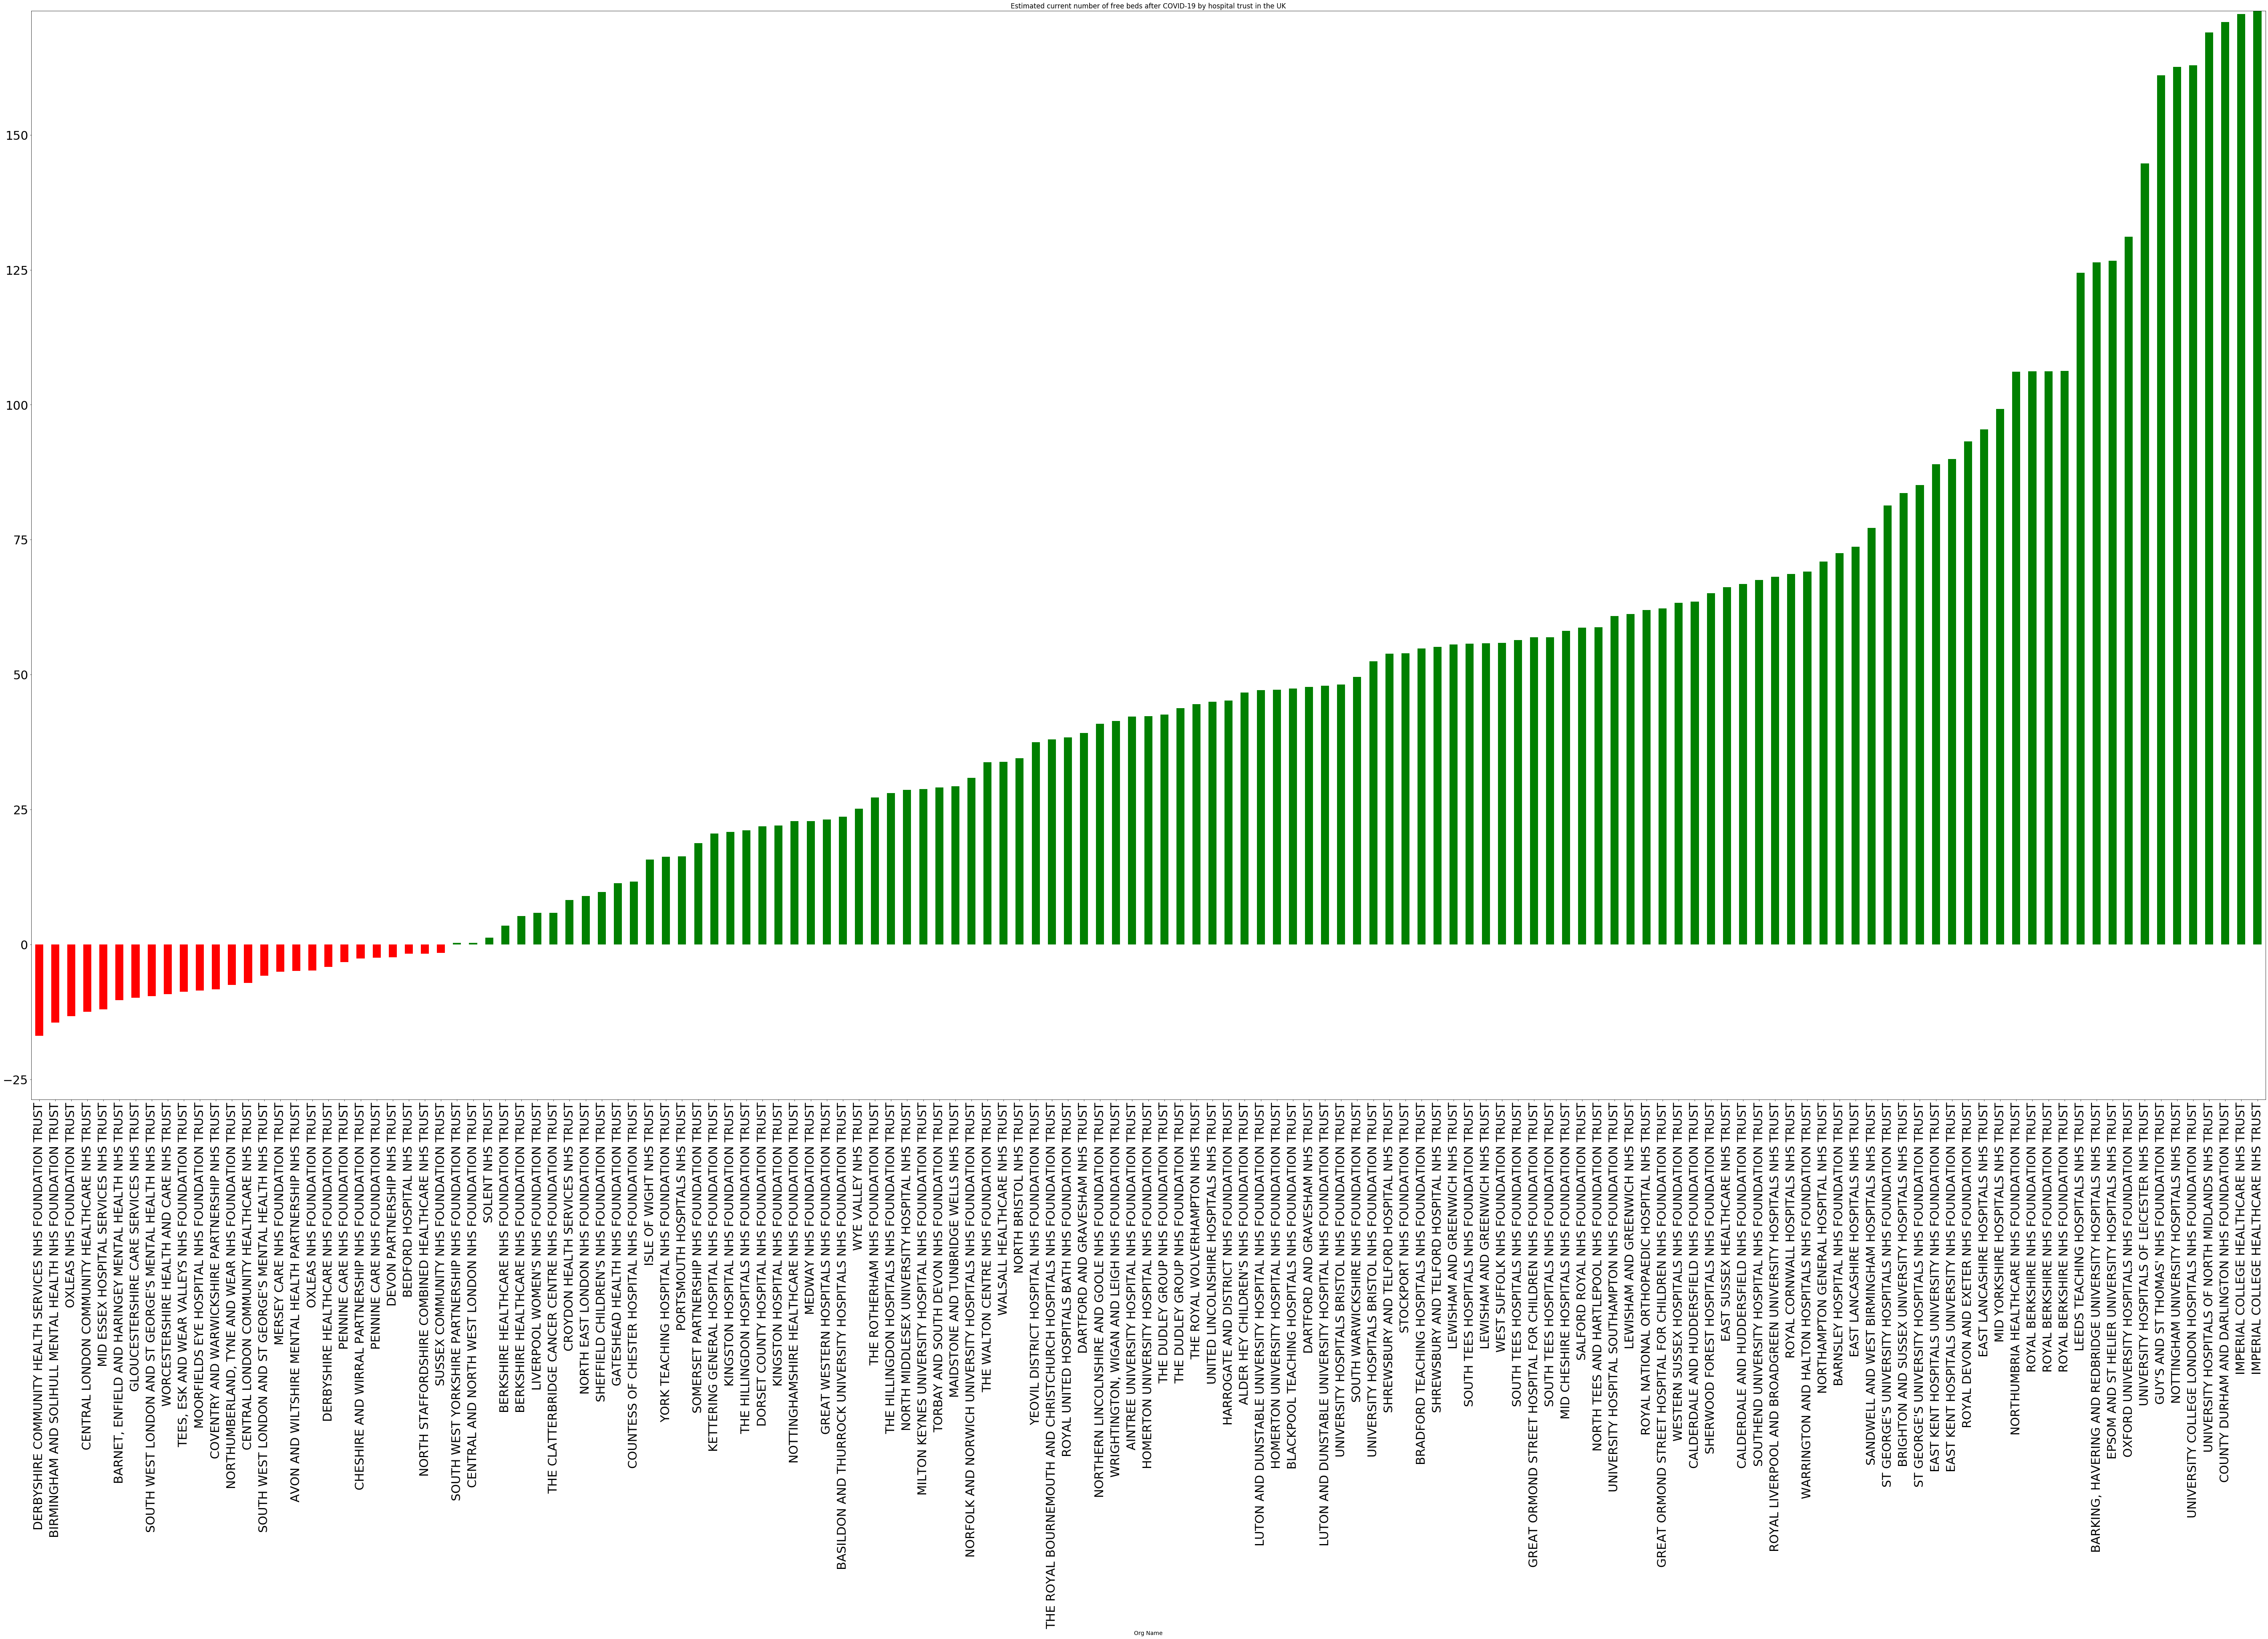

In [62]:
df_UK_merged.sort_values(by=['Free Beds INCLUDING COVID-19'])['Free Beds INCLUDING COVID-19'].dropna()[2:].plot(figsize=(100,50), kind='bar', ylim=(minimum,maximum),color=(df_UK_merged.sort_values(by=['Free Beds INCLUDING COVID-19'])['Free Beds INCLUDING COVID-19'][2:].dropna() > 0).map({True: 'g',False: 'r'}),title="Estimated current number of free beds after COVID-19 by hospital trust in the UK",fontsize = 30)

In [63]:
df_UK_merged.sort_values(by=['Free Beds INCLUDING COVID-19'])

GSS_CD  \
Org Name                                                        
SURREY AND BORDERS PARTNERSHIP NHS FOUNDATION T...  E10000030   
CUMBRIA PARTNERSHIP NHS FOUNDATION TRUST            E10000006   
DERBYSHIRE COMMUNITY HEALTH SERVICES NHS FOUNDA...  E10000007   
BIRMINGHAM AND SOLIHULL MENTAL HEALTH NHS FOUND...  E08000025   
OXLEAS NHS FOUNDATION TRUST                         E09000005   
CENTRAL LONDON COMMUNITY HEALTHCARE NHS TRUST       E09000022   
MID ESSEX HOSPITAL SERVICES NHS TRUST               E10000012   
BARNET, ENFIELD AND HARINGEY MENTAL HEALTH NHS ...  E09000014   
GLOUCESTERSHIRE CARE SERVICES NHS TRUST             E10000013   
SOUTH WEST LONDON AND ST GEORGE'S MENTAL HEALTH...  E09000032   
WORCESTERSHIRE HEALTH AND CARE NHS TRUST            E10000034   
TEES, ESK AND WEAR VALLEYS NHS FOUNDATION TRUST     E06000047   
MOORFIELDS EYE HOSPITAL NHS FOUNDATION TRUST        E09000019   
COVENTRY AND WARWICKSHIRE PARTNERSHIP NHS TRUST     E08000026   
NORTHUMBERLAND, TYNE AND WEAR NHS FOUNDATION TRUST  E08000021   
CENTRAL LONDON COMMUNITY HEALTHCARE NHS TRUST       E09000033   
SOUTH WEST LONDON AND ST GEORGE'S MENTAL HEALTH...  E09000024   
MERSEY CARE NHS FOUNDATION TRUST                    E08000012   
AVON AND WILTSHIRE MENTAL HEALTH PARTNERSHIP NH...  E06000054   
OXLEAS NHS FOUNDATION TRUST                         E09000004   
DERBYSHIRE HEALTHCARE NHS FOUNDATION TRUST          E06000015   
PENNINE CARE NHS FOUNDATION TRUST                   E08000004   
CHESHIRE AND WIRRAL PARTNERSHIP NHS FOUNDATION ...  E06000050   
PENNINE CARE NHS FOUNDATION TRUST                   E08000008   
DEVON PARTNERSHIP NHS TRUST                         E10000008   
BEDFORD HOSPITAL NHS TRUST                          E06000055   
NORTH STAFFORDSHIRE COMBINED HEALTHCARE NHS TRUST   E06000021   
SUSSEX COMMUNITY NHS FOUNDATION TRUST               E06000043   
SOUTH WEST YORKSHIRE PARTNERSHIP NHS FOUNDATION...  E08000036   
CENTRAL AND NORTH WEST LONDON NHS FOUNDATION TRUST  E09000007   
...                                                       ...   
LEICESTERSHIRE PARTNERSHIP NHS TRUST                E06000016   
SHROPSHIRE COMMUNITY HEALTH NHS TRUST               E06000020   
SHROPSHIRE COMMUNITY HEALTH NHS TRUST               E06000051   
PLYMOUTH HOSPITALS NHS TRUST                        E06000026   
TORBAY AND SOUTHERN DEVON HEALTH AND CARE NHS T...  E06000027   
PETERBOROUGH AND STAMFORD HOSPITALS NHS FOUNDAT...  E06000031   
NORTH EAST AMBULANCE SERVICE NHS FOUNDATION TRUST   E06000057   
NORTH WEST AMBULANCE SERVICE NHS TRUST              E08000001   
CENTRAL MANCHESTER UNIVERSITY HOSPITALS NHS FOU...  E08000003   
TAMESIDE HOSPITAL NHS FOUNDATION TRUST              E08000004   
TAMESIDE HOSPITAL NHS FOUNDATION TRUST              E08000008   
GREATER MANCHESTER WEST MENTAL HEALTH NHS FOUND...  E08000005   
UNIVERSITY HOSPITAL OF SOUTH MANCHESTER NHS FOU...  E08000009   
DONCASTER AND BASSETLAW HOSPITALS NHS FOUNDATIO...  E08000017   
SOUTH TYNESIDE NHS FOUNDATION TRUST                 E08000023   
CITY HOSPITALS SUNDERLAND NHS FOUNDATION TRUST      E08000024   
BIRMINGHAM CHILDREN'S HOSPITAL NHS FOUNDATION T...  E08000025   
HEART OF ENGLAND NHS FOUNDATION TRUST               E08000029   
WEST LONDON MENTAL HEALTH NHS TRUST                 E09000009   
LONDON NORTH WEST HEALTHCARE NHS TRUST              E09000015   
WEST MIDDLESEX UNIVERSITY HOSPITAL NHS TRUST        E09000018   
LONDON AMBULANCE SERVICE NHS TRUST                  E09000028   
SOUTH CENTRAL AMBULANCE SERVICE NHS FOUNDATION ...  E10000002   
CAMBRIDGESHIRE COMMUNITY SERVICES NHS TRUST         E10000003   
SOUTH WESTERN AMBULANCE SERVICE NHS FOUNDATION ...  E10000008   
HERTFORDSHIRE COMMUNITY NHS TRUST                   E10000015   
KENT COMMUNITY HEALTH NHS FOUNDATION TRUST          E10000016   
MID STAFFORDSHIRE NHS FOUNDATION TRUST              E10000028   
SOUTH STAFFORDSHIRE AND SHROPSHIRE HEALTHCARE N...  E10000028   
IPSWICH HOSPITAL NHS TRUS

# Plot a chart representing the NEXT WEEKS hospital bed vacancy by trust by incrementing over and above 2019 Q1 total free beds with COVID-19 estimated cases 1 WEEK FROM TODAY requiring hospitalisation in the UK

In [64]:
growth_factor_in_a_week

1.720977147017929

In [65]:
df_UK_merged['Predicted Free Beds INCLUDING COVID-19 in 1 WEEK'] = df_UK_merged['Free Beds Without COVID-19'] - percentage_cases_open * (percentage_hospital * growth_factor_in_a_week * df_UK_merged['TotalCases']/df_UK_merged['count'])

In [66]:
minimum = min(df_UK_merged['Predicted Free Beds INCLUDING COVID-19 in 1 WEEK'][2:].fillna(0))
maximum = max(df_UK_merged['Predicted Free Beds INCLUDING COVID-19 in 1 WEEK'][2:].fillna(0))
print(minimum, maximum)

-49.3566005415361 169.8740848849971


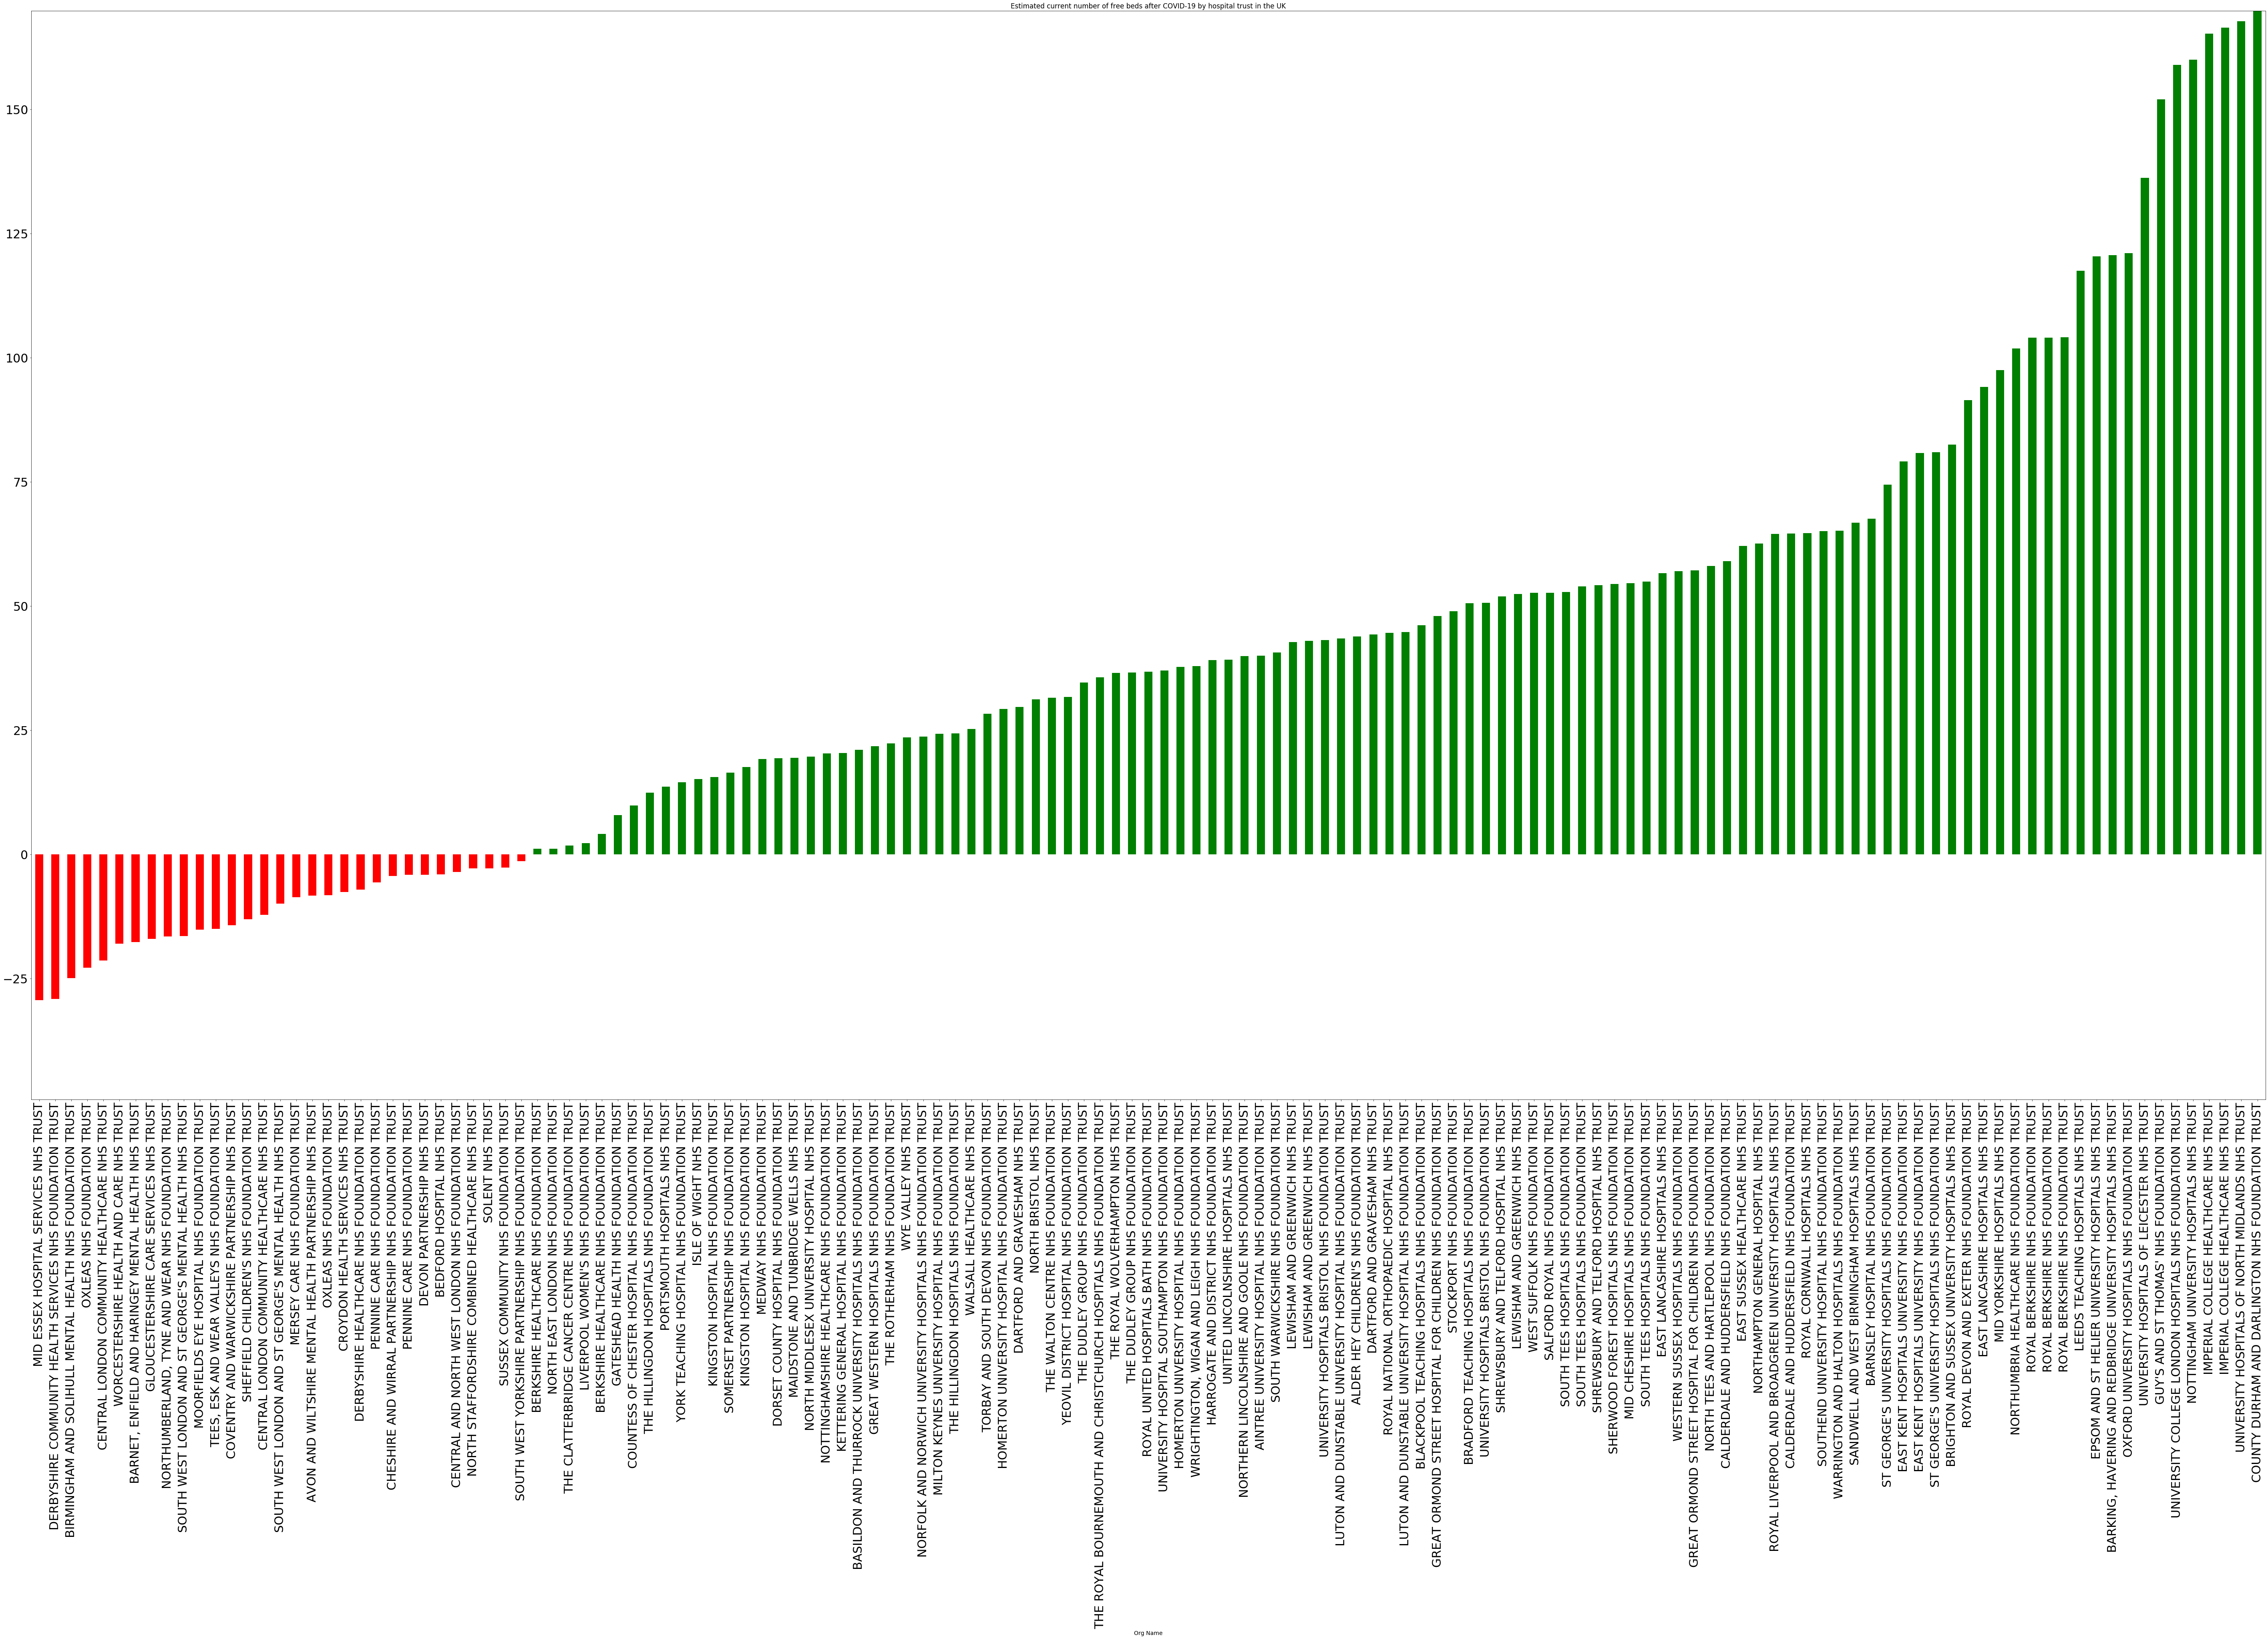

In [67]:
df_UK_merged.sort_values(by=['Predicted Free Beds INCLUDING COVID-19 in 1 WEEK'])['Predicted Free Beds INCLUDING COVID-19 in 1 WEEK'].dropna()[2:].plot(figsize=(100,50), kind='bar', ylim=(minimum,maximum),color=(df_UK_merged.sort_values(by=['Predicted Free Beds INCLUDING COVID-19 in 1 WEEK'])['Predicted Free Beds INCLUDING COVID-19 in 1 WEEK'][2:].dropna() > 0).map({True: 'g',False: 'r'}),title="Estimated current number of free beds after COVID-19 by hospital trust in the UK",fontsize = 30)

In [68]:
df_UK_merged.sort_values(by=['Predicted Free Beds INCLUDING COVID-19 in 1 WEEK']).dropna()

GSS_CD  \
Org Name                                                        
SURREY AND BORDERS PARTNERSHIP NHS FOUNDATION T...  E10000030   
CUMBRIA PARTNERSHIP NHS FOUNDATION TRUST            E10000006   
MID ESSEX HOSPITAL SERVICES NHS TRUST               E10000012   
DERBYSHIRE COMMUNITY HEALTH SERVICES NHS FOUNDA...  E10000007   
BIRMINGHAM AND SOLIHULL MENTAL HEALTH NHS FOUND...  E08000025   
OXLEAS NHS FOUNDATION TRUST                         E09000005   
CENTRAL LONDON COMMUNITY HEALTHCARE NHS TRUST       E09000022   
WORCESTERSHIRE HEALTH AND CARE NHS TRUST            E10000034   
BARNET, ENFIELD AND HARINGEY MENTAL HEALTH NHS ...  E09000014   
GLOUCESTERSHIRE CARE SERVICES NHS TRUST             E10000013   
NORTHUMBERLAND, TYNE AND WEAR NHS FOUNDATION TRUST  E08000021   
SOUTH WEST LONDON AND ST GEORGE'S MENTAL HEALTH...  E09000032   
MOORFIELDS EYE HOSPITAL NHS FOUNDATION TRUST        E09000019   
TEES, ESK AND WEAR VALLEYS NHS FOUNDATION TRUST     E06000047   
COVENTRY AND WARWICKSHIRE PARTNERSHIP NHS TRUST     E08000026   
SHEFFIELD CHILDREN'S NHS FOUNDATION TRUST           E08000019   
CENTRAL LONDON COMMUNITY HEALTHCARE NHS TRUST       E09000033   
SOUTH WEST LONDON AND ST GEORGE'S MENTAL HEALTH...  E09000024   
MERSEY CARE NHS FOUNDATION TRUST                    E08000012   
AVON AND WILTSHIRE MENTAL HEALTH PARTNERSHIP NH...  E06000054   
OXLEAS NHS FOUNDATION TRUST                         E09000004   
CROYDON HEALTH SERVICES NHS TRUST                   E09000008   
DERBYSHIRE HEALTHCARE NHS FOUNDATION TRUST          E06000015   
PENNINE CARE NHS FOUNDATION TRUST                   E08000004   
CHESHIRE AND WIRRAL PARTNERSHIP NHS FOUNDATION ...  E06000050   
PENNINE CARE NHS FOUNDATION TRUST                   E08000008   
DEVON PARTNERSHIP NHS TRUST                         E10000008   
BEDFORD HOSPITAL NHS TRUST                          E06000055   
CENTRAL AND NORTH WEST LONDON NHS FOUNDATION TRUST  E09000007   
NORTH STAFFORDSHIRE COMBINED HEALTHCARE NHS TRUST   E06000021   
...                                                       ...   
CALDERDALE AND HUDDERSFIELD NHS FOUNDATION TRUST    E08000033   
ROYAL CORNWALL HOSPITALS NHS TRUST                  E06000052   
SOUTHEND UNIVERSITY HOSPITAL NHS FOUNDATION TRUST   E06000033   
WARRINGTON AND HALTON HOSPITALS NHS FOUNDATION ...  E08000013   
SANDWELL AND WEST BIRMINGHAM HOSPITALS NHS TRUST    E08000025   
BARNSLEY HOSPITAL NHS FOUNDATION TRUST              E08000016   
ST GEORGE'S UNIVERSITY HOSPITALS NHS FOUNDATION...  E09000032   
EAST KENT HOSPITALS UNIVERSITY NHS FOUNDATION T...  E09000031   
EAST KENT HOSPITALS UNIVERSITY NHS FOUNDATION T...  E09000030   
ST GEORGE'S UNIVERSITY HOSPITALS NHS FOUNDATION...  E09000024   
BRIGHTON AND SUSSEX UNIVERSITY HOSPITALS NHS TRUST  E06000043   
ROYAL DEVON AND EXETER NHS FOUNDATION TRUST         E10000008   
EAST LANCASHIRE HOSPITALS NHS TRUST                 E06000008   
MID YORKSHIRE HOSPITALS NHS TRUST                   E08000036   
NORTHUMBRIA HEALTHCARE NHS FOUNDATION TRUST         E08000022   
ROYAL BERKSHIRE NHS FOUNDATION TRUST                E06000041   
ROYAL BERKSHIRE NHS FOUNDATION TRUST                E06000037   
ROYAL BERKSHIRE NHS FOUNDATION TRUST                E06000038   
LEEDS TEACHING HOSPITALS NHS TRUST                  E08000035   
EPSOM AND ST HELIER UNIVERSITY HOSPITALS NHS TRUST  E09000029   
BARKING, HAVERING AND REDBRIDGE UNIVERSITY HOSP...  E09000002   
OXFORD UNIVERSITY HOSPITALS NHS FOUNDATION TRUST    E10000025   
UNIVERSITY HOSPITALS OF LEICESTER NHS TRUST         E10000018   
GUY'S AND ST THOMAS' NHS FOUNDATION TRUST           E09000028   
UNIVERSITY COLLEGE LONDON HOSPITALS NHS FOUNDAT...  E09000007   
NOTTINGHAM UNIVERSITY HOSPITALS NHS TRUST           E06000018   
IMPERIAL COLLEGE HEALTHCARE NHS TRUST               E09000020   
IMPERIAL COLLEGE HEALTHCARE NHS TRUST               E09000013   
UNIVERSITY HOSPITALS OF NORTH MIDLANDS NHS TRUST    E06000021   
COUNTY DURHAM AND DARLING